In [307]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [308]:
cust_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
cust_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


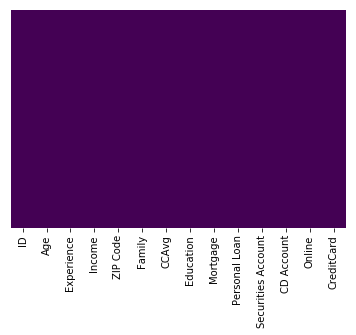

In [309]:
sns.heatmap(cust_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [310]:
cust_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [311]:
cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [312]:
#Experience can not be negative. Exprience can be 0, when the person gets money from some business - like passive income
temp_df = cust_df.loc[cust_df['Experience'] < 0]
temp_df.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,52,52,52,52,52,52,52,52,52,52,52,52,52


In [313]:
cust_df = cust_df.loc[cust_df['Experience'] >= 0]

In [314]:
def treat_outliers(col, df):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    lowval = q1 - 1.5* iqr
    highval = q3 + 1.5 * iqr
    loc_ret = df.loc[(df[col] > lowval) & (df[col] < highval)]
    return loc_ret

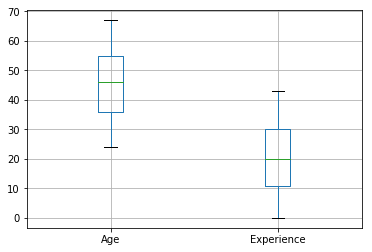

In [315]:
boxplot = cust_df.boxplot(column=['Age', 'Experience'])
#No outliers for Age and Experience

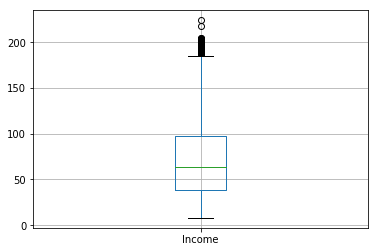

In [316]:
boxplot = cust_df.boxplot(column=['Income'])

In [317]:
cust_df = treat_outliers('Income', cust_df)
cust_df.shape
#After treating the outliers of Income, the ratio of sample Personal Loan(4466:438) is in the same range 8.9%
#This number is attained by
####### cust_df.groupby('Personal Loan').count()

(4852, 14)

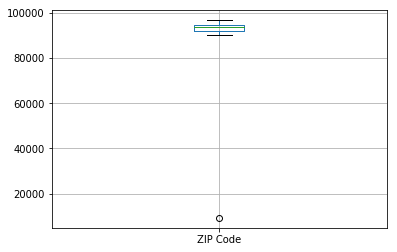

In [318]:
boxplot = cust_df.boxplot(column=['ZIP Code'])

In [319]:
cust_df = treat_outliers('ZIP Code', cust_df)
cust_df.shape
#After treating the outliers of ZIP Code, the ratio of sample Personal Loan(4465:438) is in the same range 8.9%

(4851, 14)

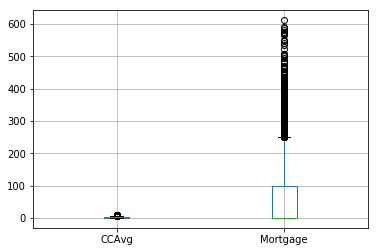

In [320]:
boxplot = cust_df.boxplot(column=['CCAvg', 'Mortgage'])

In [321]:
cust_df_ccavg = treat_outliers('CCAvg', cust_df)
cust_df_ccavg.shape
#After treating the outliers of ZIP Code, the ratio of sample Personal Loan(4284:324) is reduced to 7%
cust_df_mgage = treat_outliers('Mortgage', cust_df)
cust_df_mgage.shape
#After treating the outliers of ZIP Code, the ratio of sample Personal Loan(4284:324) is reduced to 7.7%

# As the target data is already very less (9%), I am trying the modelling without removing outliers for CCAvg and Mortgage 

(4575, 14)

In [322]:
cust_df.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4413,4413,4413,4413,4413,4413,4413,4413,4413,4413,4413,4413,4413
1,438,438,438,438,438,438,438,438,438,438,438,438,438


In [323]:
#As Cust Id is just an identifier, that will not be needed for modelling, so dropping ID
cust_df.drop('ID', axis=1, inplace=True)

In [324]:
cust_df.groupby('Personal Loan').mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.667346,20.436664,64.608203,93171.246998,2.375935,1.681507,1.850895,51.162928,0.102425,0.036483,0.595513,0.293678
1,45.027397,19.815068,140.203196,93175.365297,2.618721,3.829772,2.216895,95.305936,0.125571,0.294521,0.609589,0.303653


In [325]:
cust_df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.0,0.99,-0.049,-0.032,-0.043,-0.045,0.042,-0.014,-0.016,-2.9e-06,0.00063,0.017,0.0063
Experience,0.99,1.0,-0.041,-0.031,-0.049,-0.043,0.014,-0.013,-0.016,-0.001,0.0025,0.017,0.0076
Income,-0.049,-0.041,1.0,-0.027,-0.15,0.63,-0.19,0.19,0.5,-0.0007,0.17,0.015,-0.0007
ZIP Code,-0.032,-0.031,-0.027,1.0,0.027,-0.011,-0.0078,0.0055,0.00067,0.00062,0.028,0.033,0.023
Family,-0.043,-0.049,-0.15,0.027,1.0,-0.099,0.058,-0.024,0.06,0.018,0.011,0.0085,0.01
CCAvg,-0.045,-0.043,0.63,-0.011,-0.099,1.0,-0.13,0.1,0.37,0.014,0.14,-0.0016,-0.0043
Education,0.042,0.014,-0.19,-0.0078,0.058,-0.13,1.0,-0.032,0.13,-0.009,0.0079,-0.014,-0.013
Mortgage,-0.014,-0.013,0.19,0.0055,-0.024,0.1,-0.032,1.0,0.13,-0.002,0.086,-0.0049,-0.0045
Personal Loan,-0.016,-0.016,0.5,0.00067,0.06,0.37,0.13,0.13,1.0,0.022,0.31,0.0082,0.0063
Securities Account,-2.9e-06,-0.001,-0.0007,0.00062,0.018,0.014,-0.009,-0.002,0.022,1.0,0.32,0.013,-0.018


In [326]:
#As Age and Experience are highly correlated, we can drop either of the 2 fields
cust_df.drop('Age', axis=1, inplace=True)

In [327]:
#And the least correlation to Personal Loan was shown by ZIP Code. so, droping that field too
cust_df.drop('ZIP Code', axis=1, inplace=True)

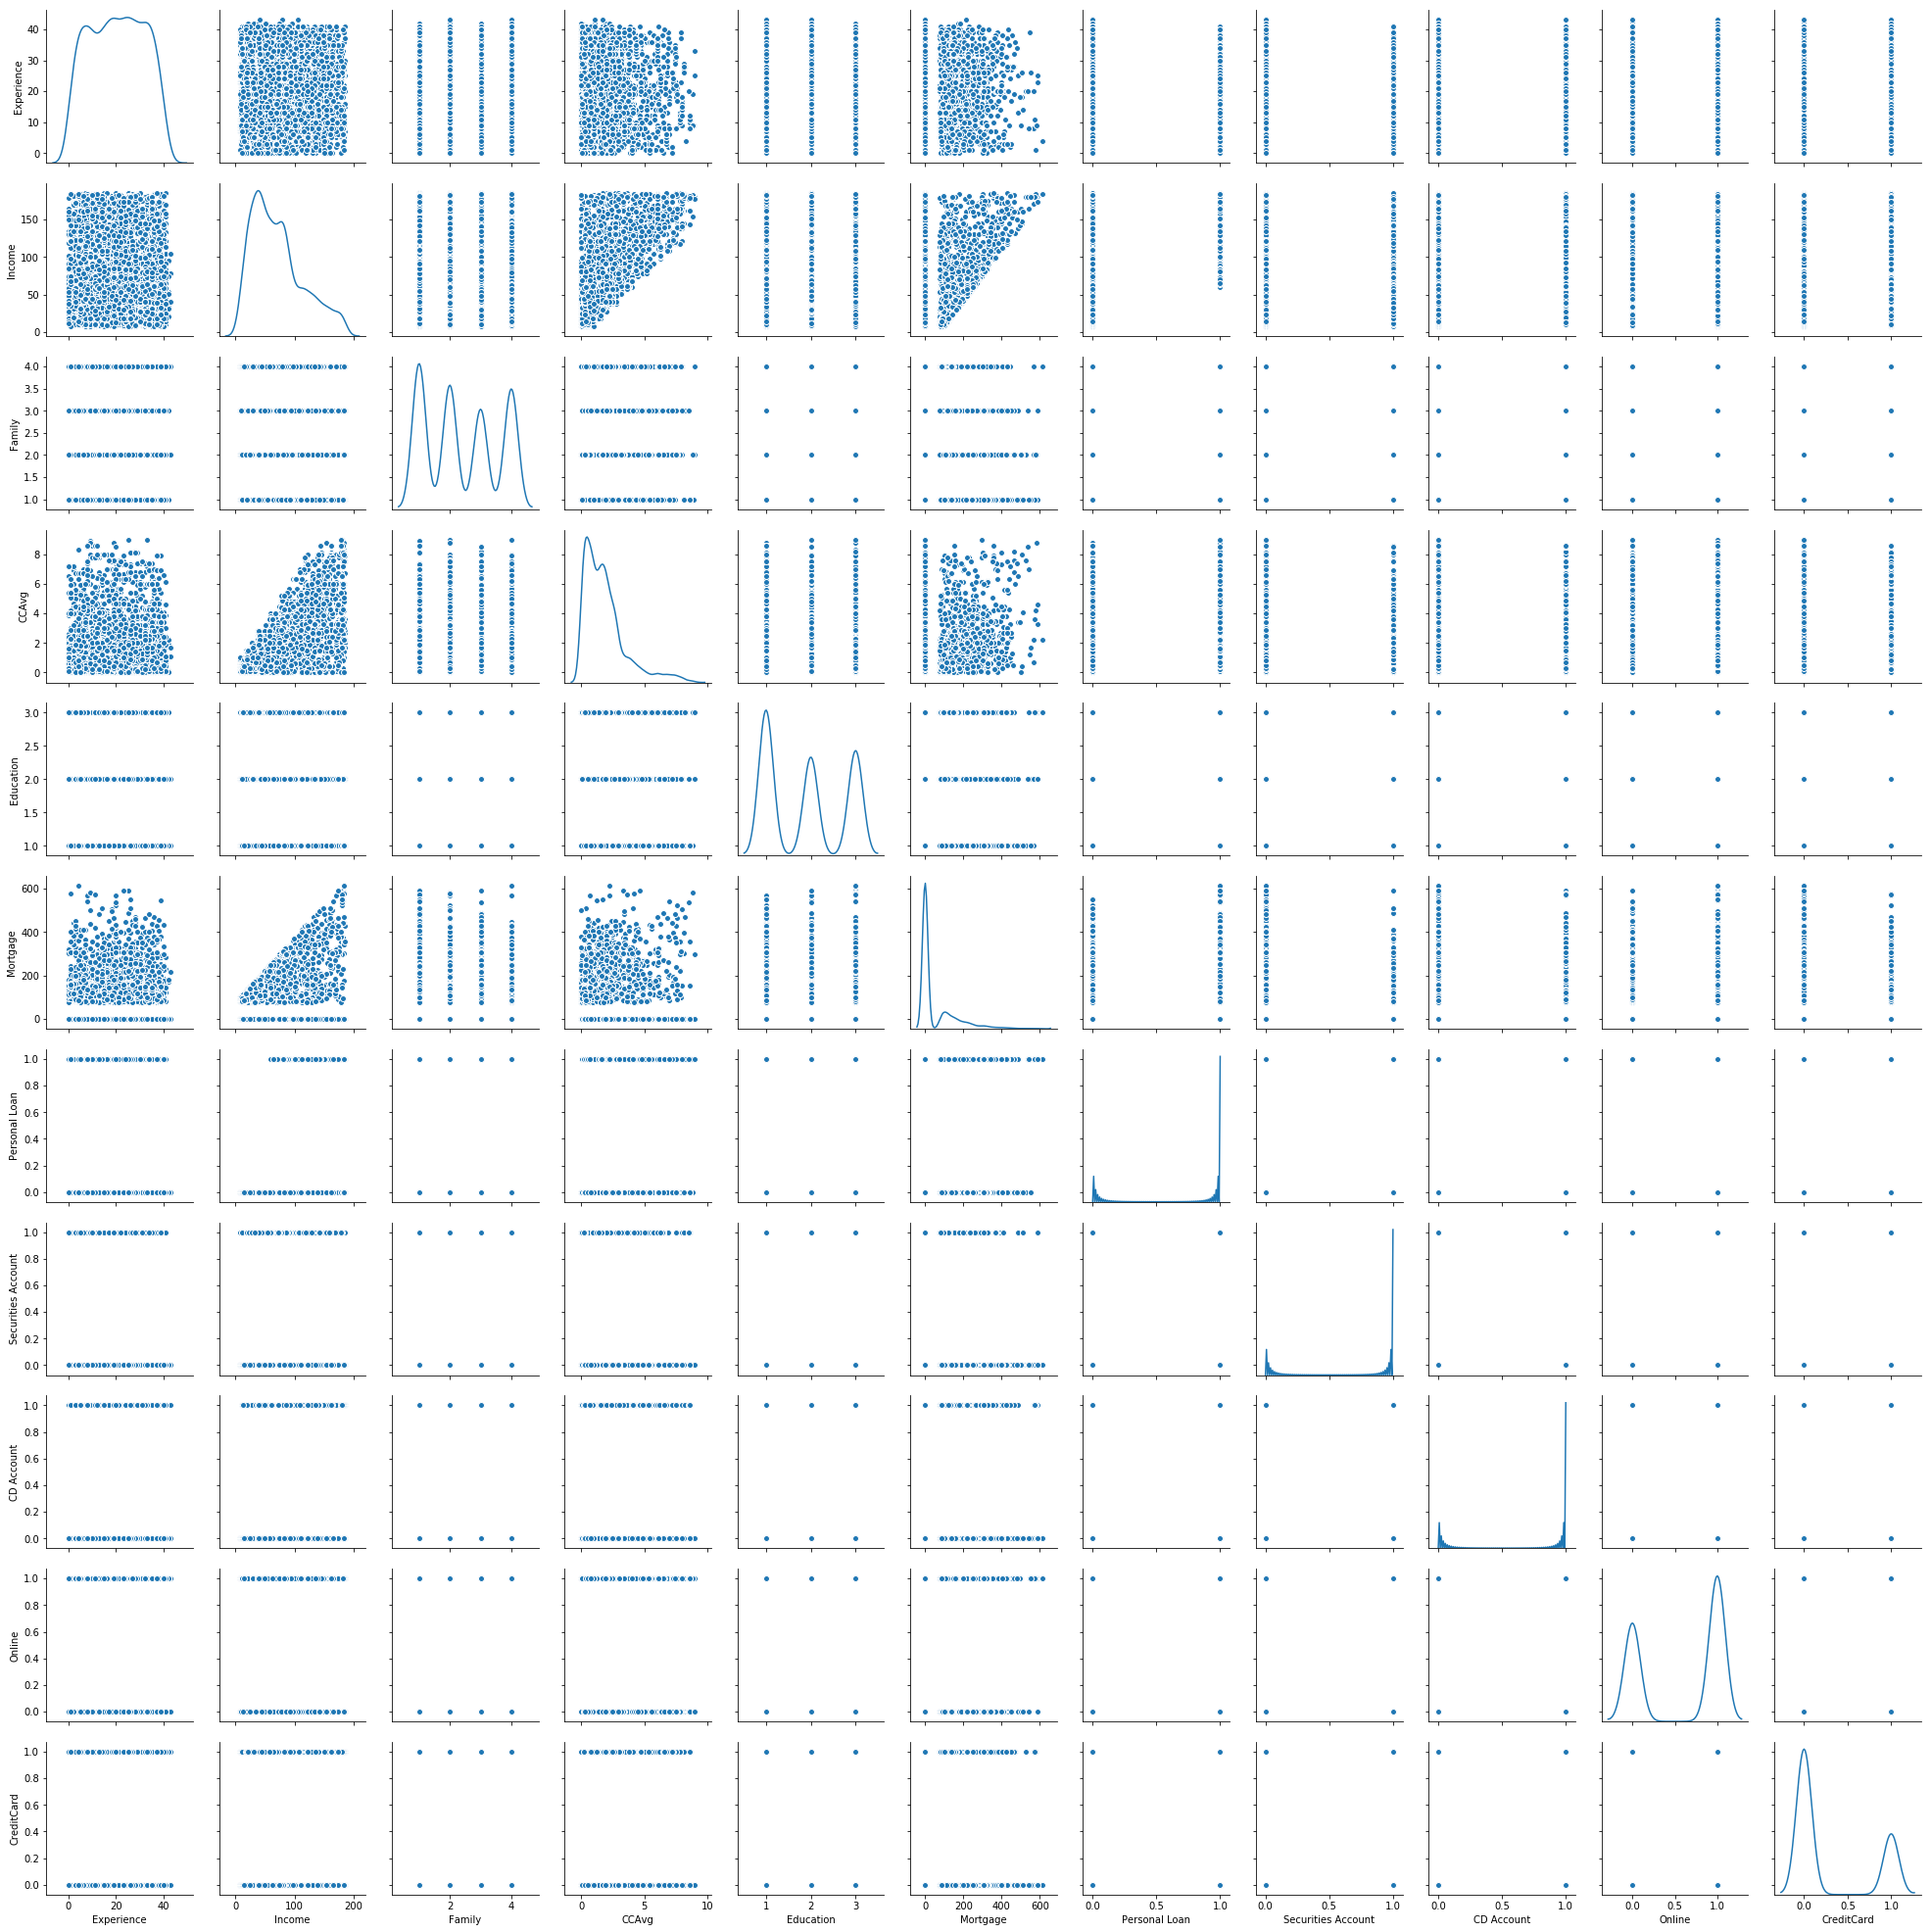

In [328]:
sns.pairplot(cust_df, diag_kind='kde')

In [329]:
# For the continous columns - Experience, Income,CCAvg, Mortgage, we see normal distribution
# In that Mortgage seems to be having skewed data

# Rest of the columns are basically classifiers

In [330]:
X = cust_df[['Experience', 'Income', 'Family', 'CCAvg', 'Education',
             'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
Y = cust_df[['Personal Loan']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [331]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lgr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


C:\AIML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [332]:
from sklearn.metrics import confusion_matrix
conf_mtrx_lgr = confusion_matrix(y_test, y_pred)
print(conf_mtrx_lgr)

[[1312   12]
 [  61   71]]


In [333]:
# 1312 and 71 are correct predictions
# 12 and 61 are failed predictions

In [334]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=7, weights='uniform')
NNH.fit(X_train, y_train)
y_pred_NNH = NNH.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(NNH.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.92


C:\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [335]:
conf_mtrx_nnh = confusion_matrix(y_test, y_pred_NNH)
print(conf_mtrx_nnh)

[[1295   29]
 [  93   39]]


In [336]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNB = GNB.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(GNB.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on test set: 0.89


C:\AIML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [337]:
conf_mtrx_gnb = confusion_matrix(y_test, y_pred_GNB)
print(conf_mtrx_gnb)

[[1221  103]
 [  54   78]]


In [338]:
# From all the above model predictions, Logistic Regression Model's prediction was better with better accuracy close to 96%
# 
# Logistic Regression Classifier: 96%
#------------------------------------
# It predicted better because the features in the training data had no multi collenearity. 
# Still the difference between this model's prediction is not too far from KNN's prediction

# K-Nearest Neighbors Classification: 92%
#----------------------------------------
# Tried different hyper-parameters, the accuracy is not raising above 92%.
# Probably with limited and biased sample (89:9), the prediction accuracy is also restricted

# Naive Bayes: 89%
#-----------------
# Naive Bayes works on the basic assumption that each feature is equal and independent in contributing to the outcome
# From the correlation graph, we have understood that the chosen features are all not strongly correlated. 
# Still, the accuracy is less because not all the chosen feature could be contributing to the outcome equally
